# Solution to the Initial Value Problem:

We solve
\begin{equation}
\epsilon\frac{\partial \theta}{\partial t} + \cos{(y)}\frac{\partial\theta}{\partial x} = \frac{1}{Pe}\frac{\partial^2\theta}{\partial x^2} + \epsilon\frac{\partial^2\theta}{\partial y^2} ,
\end{equation}

in the domain $0<y<2\pi$, $-2 \pi < x < 2 \pi$, $t>0$. Thus smallest wavenumber (other than zero) is $k=0.5$.

The initial condition is the Gaussian

\begin{equation}
\theta(x, y, 0) = \theta_{0}\exp{(-x^2/\sigma^2)} .
\end{equation}


### We only calculate the average solution below



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import xarray as xr

In [2]:
from mathieu_functions import mathieu_functions as mfs
from mathieu_functions import A_coefficients

In [3]:
# =================================
# Important parameters to define
# =================================
L = np.pi # Half of channel width (y-direction)
N = 50  # length of k-array
alpha = 2  # length of channel periodic in x. I have used alpha=10 before, but for the gaussian initial condition a value of 2 is better.
Nx = 500  # length of x-array
sigma=0.5  # changes width of gaussian

eps = 0.05  # ta / td << 1 for weakly diffusive processes.
Pe = 1 / eps

x = np.linspace(-alpha * L, alpha * L, Nx)
y = np.linspace(0, L, Nx//5)
X, Y = np.meshgrid(x, y)

K = np.arange(0, N / alpha, 1 / alpha)  # wavenumber array.
K_test = np.linspace(0, N/alpha, 1000)
Q = (1j) * 2 * K / eps  # Canonical Mathieu parameter
qf = Q[-1].imag  # Largest value of Mathieu's parameter. 

M = 75  # matrix size
t = np.linspace(0, .25, 100)
colors = ['#0000cc', '#990000', 'darkgreen',
          'indigo', '#009999', 'orange', 
         'k']

In [4]:
K

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5])

In [5]:
print('Last element of K, q, size(q)')
K[-1], Q[-1], len(Q)

Last element of K, q, size(q)


(24.5, 980j, 50)

## Calculate Mathieu Eigenfunctions and Eigenvals

We don't need to calculate the Eigenfunctions, as we are only interested in calculated the averaged (exact) solution. We only
need the eigenvalues $a_{2n}$ and the Fourier Coefficients $A_{2r}^{(2n)}$.

In [6]:
A_vals = A_coefficients(Q, M, 'even', 'one')  ## NOTE: slow since Q and M are large.

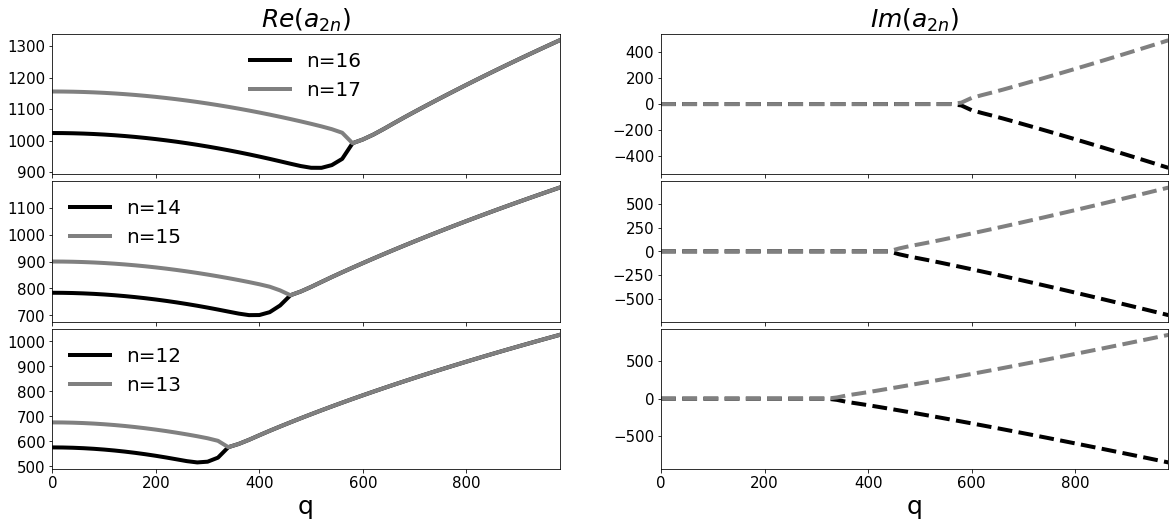

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))
gs = gridspec.GridSpec(3,2)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[4])
plt.plot(Q.imag, A_vals['a24'].real,'k', lw=4, label='n=12')
plt.plot(Q.imag, A_vals['a26'].real, '#808080', lw=4, label='n=13')
plt.xlim(Q[0].imag, Q[-1].imag)
# plt.ylim(0, 10)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
plt.legend(fontsize=20, frameon=False)
ax2 = plt.subplot(gs[5])
plt.plot(Q.imag, A_vals['a24'].imag, 'k', lw=4, ls='--', label='n=12')
plt.plot(Q.imag, A_vals['a26'].imag, '#808080', lw=4, ls='--', label='n=13')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
ax3 = plt.subplot(gs[2])
plt.plot(Q.imag, A_vals['a28'].real, 'k', lw=4, label='n=14')
plt.plot(Q.imag, A_vals['a30'].real, '#808080', lw=4, label='n=15')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.legend(fontsize=20, frameon=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax4 = plt.subplot(gs[3])
plt.plot(Q.imag, A_vals['a28'].imag, 'k', lw=4, ls='--', label='n=14')
plt.plot(Q.imag, A_vals['a30'].imag, '#808080',lw=4, ls='--', label='n=15')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.setp(ax4.get_xticklabels(), visible=False)
# plt.legend(fontsize=20, frameon=False)
ax5 = plt.subplot(gs[0])
plt.plot(Q.imag, A_vals['a32'].real, 'k', lw=4, label='n=16')
plt.plot(Q.imag, A_vals['a34'].real, '#808080', lw=4, label='n=17')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.legend(fontsize=20, frameon=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.title(r'$Re(a_{2n})$', fontsize=25)
ax6 = plt.subplot(gs[1])
plt.plot(Q.imag, A_vals['a32'].imag, 'k', lw=4, ls='--', label='n=16')
plt.plot(Q.imag, A_vals['a34'].imag, '#808080', lw=4, ls='--', label='n=17')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.setp(ax6.get_xticklabels(), visible=False)
plt.title(r'$Im(a_{2n})$', fontsize=25)
plt.show()

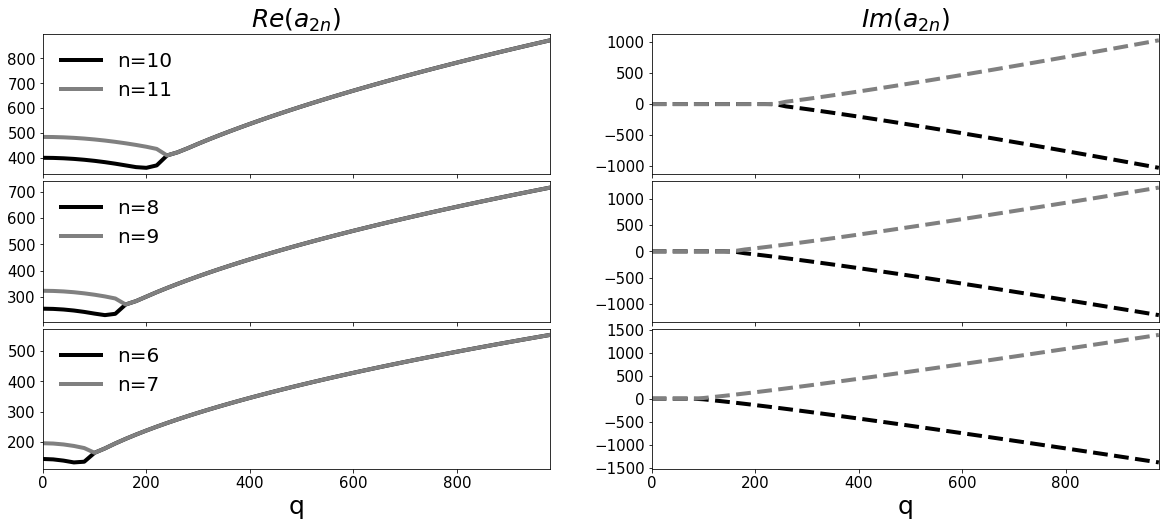

In [8]:
fig, ax = plt.subplots(figsize=(20, 8))
gs = gridspec.GridSpec(3,2)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[4])
plt.plot(Q.imag, A_vals['a12'].real,'k', lw=4, label='n=6')
plt.plot(Q.imag, A_vals['a14'].real, '#808080', lw=4, label='n=7')
plt.xlim(Q[0].imag, Q[-1].imag)
# plt.ylim(0, 10)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
plt.legend(fontsize=20, frameon=False)
ax2 = plt.subplot(gs[5])
plt.plot(Q.imag, A_vals['a12'].imag, 'k', lw=4, ls='--', label='n=6')
plt.plot(Q.imag, A_vals['a14'].imag, '#808080', lw=4, ls='--', label='n=7')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
ax3 = plt.subplot(gs[2])
plt.plot(Q.imag, A_vals['a16'].real, 'k', lw=4, label='n=8')
plt.plot(Q.imag, A_vals['a18'].real, '#808080', lw=4, label='n=9')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.legend(fontsize=20, frameon=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax4 = plt.subplot(gs[3])
plt.plot(Q.imag, A_vals['a16'].imag, 'k', lw=4, ls='--', label='n=8')
plt.plot(Q.imag, A_vals['a18'].imag, '#808080',lw=4, ls='--', label='n=9')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.setp(ax4.get_xticklabels(), visible=False)
# plt.legend(fontsize=20, frameon=False)
ax5 = plt.subplot(gs[0])
plt.plot(Q.imag, A_vals['a20'].real, 'k', lw=4, label='n=10')
plt.plot(Q.imag, A_vals['a22'].real, '#808080', lw=4, label='n=11')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.legend(fontsize=20, frameon=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.title(r'$Re(a_{2n})$', fontsize=25)
ax6 = plt.subplot(gs[1])
plt.plot(Q.imag, A_vals['a20'].imag, 'k', lw=4, ls='--', label='n=10')
plt.plot(Q.imag, A_vals['a22'].imag, '#808080', lw=4, ls='--', label='n=11')
plt.xlim(Q[0].imag, Q[-1].imag)
plt.yticks(size=15)
plt.setp(ax6.get_xticklabels(), visible=False)
plt.title(r'$Im(a_{2n})$', fontsize=25)
plt.show()

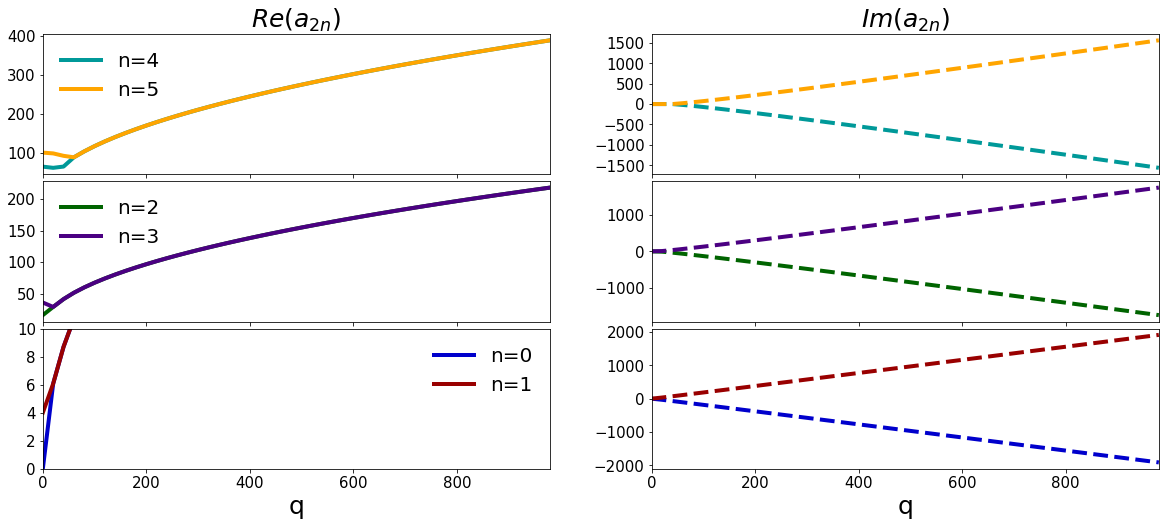

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))
gs = gridspec.GridSpec(3,2)
gs.update(hspace=0.05)
ax1 = plt.subplot(gs[4])
plt.plot(Q.imag, A_vals['a0'].real, color=colors[0], lw=4, label='n=0')
plt.plot(Q.imag, A_vals['a2'].real, color=colors[1], lw=4, label='n=1')
plt.xlim(0, qf)
plt.ylim(0, 10)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
plt.legend(fontsize=20, frameon=False)
ax2 = plt.subplot(gs[5])
plt.plot(Q.imag, A_vals['a0'].imag, color=colors[0], lw=4, ls='--', label='n=0')
plt.plot(Q.imag, A_vals['a2'].imag, color=colors[1], lw=4, ls='--', label='n=1')
plt.xlim(0, qf)
plt.yticks(size=15)
plt.xlabel('q', fontsize=25)
plt.xticks(size=15)
ax3 = plt.subplot(gs[2])
plt.plot(Q.imag, A_vals['a4'].real, color=colors[2], lw=4, label='n=2')
plt.plot(Q.imag, A_vals['a6'].real, color=colors[3], lw=4, label='n=3')
plt.xlim(0, qf)
plt.yticks(size=15)
plt.legend(fontsize=20, frameon=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax4 = plt.subplot(gs[3])
plt.plot(Q.imag, A_vals['a4'].imag, color=colors[2], lw=4, ls='--', label='n=2')
plt.plot(Q.imag, A_vals['a6'].imag, color=colors[3], lw=4, ls='--', label='n=3')
plt.xlim(0, qf)
plt.yticks(size=15)
plt.setp(ax4.get_xticklabels(), visible=False)
# plt.legend(fontsize=20, frameon=False)
ax5 = plt.subplot(gs[0])
plt.plot(Q.imag, A_vals['a8'].real, color=colors[4], lw=4, label='n=4')
plt.plot(Q.imag, A_vals['a10'].real, color=colors[5], lw=4, label='n=5')
plt.xlim(0, qf)
plt.yticks(size=15)
plt.legend(fontsize=20, frameon=False)
plt.setp(ax5.get_xticklabels(), visible=False)
plt.title(r'$Re(a_{2n})$', fontsize=25)
ax6 = plt.subplot(gs[1])
plt.plot(Q.imag, A_vals['a8'].imag, color=colors[4], lw=4, ls='--', label='n=4')
plt.plot(Q.imag, A_vals['a10'].imag, color=colors[5], lw=4, ls='--', label='n=5')
plt.xlim(0, qf)
plt.yticks(size=15)
plt.setp(ax6.get_xticklabels(), visible=False)
plt.title(r'$Im(a_{2n})$', fontsize=25)
plt.show()

## Create Ordered Lists

In [10]:
OM = []
AA = []
for k in range(M // 2):
    OM.append(0.25*np.copy(A_vals['a' + str(2 * k)]))
    AA.append(np.copy(A_vals['A' + str(2 * k)][:, 0]))


COS = [np.exp(K[i] * x*(1j)) for i in range(N)]

## Gaussian Initial condition

In [11]:
G = np.exp(-(x/sigma)**2)

In [12]:
fac = np.sqrt(np.pi)*sigma/(2*L)
arg = ((2 * L) / (np.pi*sigma))**2
cn = []
for n in range(N):
    cn.append(fac * np.exp(-K[n]**2/(arg**2)))

## Defines a function that constructs the solution 

In [13]:
def evolve_ds(AA, OM, K, cn, sigma, X, Y, t):
    """Constructs the solution to the IVP. So far, only works in case Phi=1"""
    ## Initialize the array
    coords = {"time": t, "x": X[0, :]}
    Temp = xr.DataArray(np.nan, coords=coords, dims=["time", 'x'])
    ds = xr.Dataset({'Theta': Temp})
    N = len(K)
    for i in range(len(t)):
#         print(i)
        coeff=[]
        for k in range(N):
            CE2n = [2 * (AA[r][k]**2) * np.exp(-(OM[r][k] + K[k]**2)*t[i]) for r in range(len(AA))]
            CE2n = sum(CE2n) # r-sum
            coeff.append(cn[k] * CE2n * COS[k])
        T0 = (sigma**2)*np.sum(coeff, axis=0).real # k-sum
        ds['Theta'].data[i, :] = T0
    return ds

## Construct solution

In [14]:
ds = evolve_ds(AA, OM, K, cn, sigma, X, Y, t)

## Initial condition


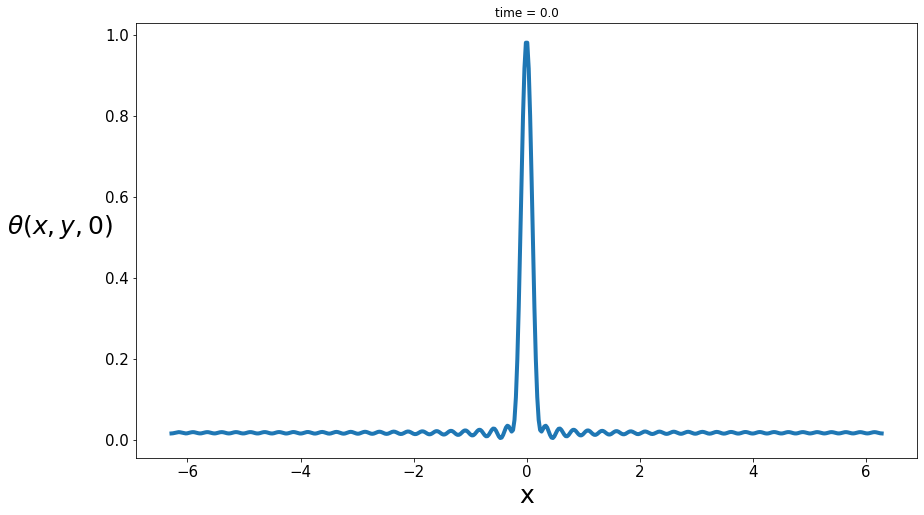

In [15]:
fig, ax = plt.subplots(figsize=(14, 8))
ds.Theta.isel(time=0).plot(lw=4)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('x', fontsize=25)
plt.ylabel(r'$\theta(x, y, 0)$', fontsize=25, rotation=0, labelpad=45)
plt.show()

## Hovmoeller plot of (cross-channel) mean solution to the Advection Diffusion Equation

In [16]:
T, Xt = np.meshgrid(x, t)

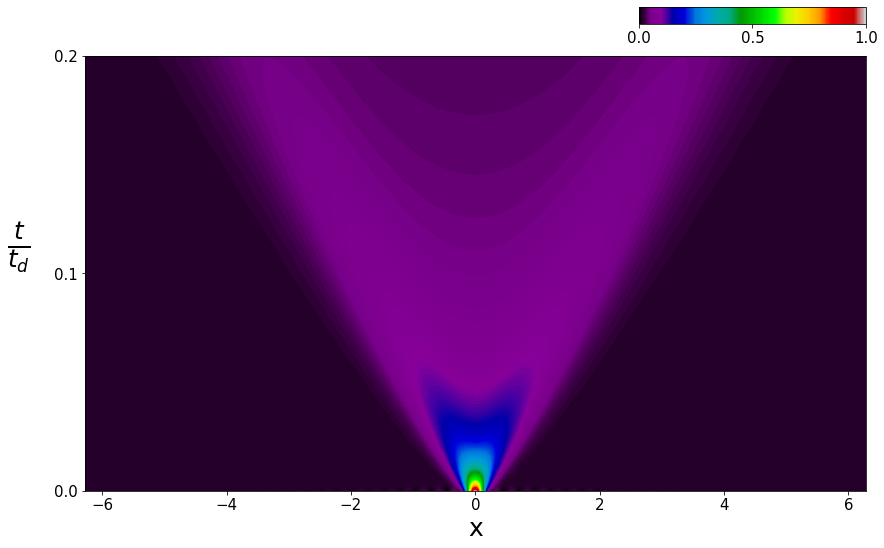

In [17]:
cmap='nipy_spectral'
fig, ax = plt.subplots(figsize=(14, 8))
cf=plt.contourf(T, Xt, ds.Theta,  levels=np.linspace(0, 1, 1000), cmap=cmap)
plt.xticks(size=15)
plt.yticks([0, .1, .2], size=15)
plt.ylim(0, 0.2)
plt.xlabel('x', fontsize=25)
plt.xlim(-alpha * L, alpha * L)
plt.ylabel(r'$\frac{t}{t_{d}}$', fontsize=35, rotation=0, labelpad = 35)
cbaxes = fig.add_axes([0.675, 0.935, 0.225, 0.03])
clb1 = plt.colorbar(cf,cax=cbaxes,ticks=[0, 0.5, 1],orientation='horizontal')
clb1.ax.tick_params(labelsize=15)
plt.show()